In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import numpy as np
from csrank.fate_choice import FATEChoiceFunction

# Learning choice functions

We apply our first-aggregate-then-evaluate (FATE) architecture to the problem of learning choice functions.
We will first start to investigate latent linear functions to sanity check our implementation.
Then we will move to the problem of learning Pareto-optimality.
## Learning a latent linear function


In [103]:
data_seed = 124
weight_seed = 5
n_train = 10000
n_test = 10000
n_features = 2
n_objects = 6
n_rep_units = 5
threshold = 2

In [104]:
from sklearn.utils import check_random_state
def make_latent_linear_choices(n_inst=10000, n_features=2, n_objects=6,
                               n_rep_units=5, threshold=0.,
                               data_seed=None, weight_seed=None):
    rand = check_random_state(data_seed)
    ranw = check_random_state(weight_seed)
    X = rand.uniform(-1, 1, size=(n_inst, n_objects, n_features))
    W_rep = ranw.randn(n_features, n_rep_units)
    rep = X.dot(W_rep).mean(axis=-2)
    w_join = ranw.randn(n_features + n_rep_units)
    joint_matrix = np.empty((n_objects, n_inst, n_features + n_rep_units),
                            dtype=np.float32)
    for i in range(n_objects):
        joint_matrix[i] = np.concatenate((X[:, i], rep), axis=-1)
    scores = joint_matrix.dot(w_join)
    Y = scores > threshold
    return X, Y.T, W_rep, w_join

In [105]:
X_train, Y_train, W_rep, w_join = make_latent_linear_choices(
    n_inst=n_train,
    n_features=n_features,
    n_objects=n_objects,
    n_rep_units=n_rep_units,
    data_seed=data_seed,
    weight_seed=weight_seed,
    threshold=threshold)
X_test, Y_test, W_rep, w_join = make_latent_linear_choices(
    n_inst=n_train,
    n_features=n_features,
    n_objects=n_objects,
    n_rep_units=n_rep_units,
    data_seed=data_seed+1,
    weight_seed=weight_seed,
    threshold=threshold)
print(Y_train.mean())

0.08448333333333333


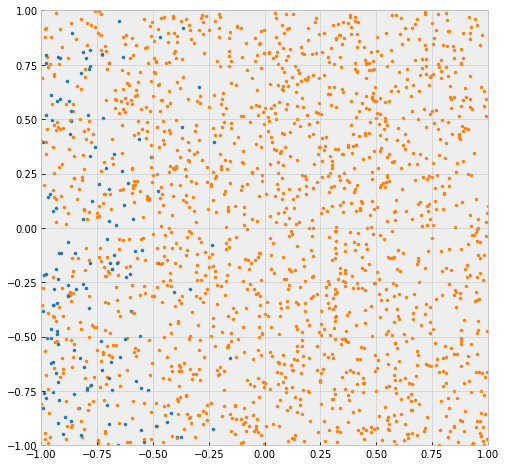

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
colors = sns.color_palette('tab10', n_colors=2)
for i, (x, y) in enumerate(zip(X_train[:300], Y_train[:300])):
    ax.scatter(x[y][:, 0], x[y][:, 1], c=[colors[0]], marker='.')
    ax.scatter(x[~y][:, 0], x[~y][:, 1], c=[colors[1]], marker='.')

In [113]:
from keras.optimizers import SGD
from keras.metrics import binary_accuracy
fate = FATEChoiceFunction(n_object_features=n_features,
                          n_hidden_joint_layers=2,
                          n_hidden_joint_units=32,
                          n_hidden_set_layers=2,
                          n_hidden_set_units=32,
                          optimizer=SGD(lr=1e-3, momentum=0.9, nesterov=True),
                          metrics=[binary_accuracy])

In [114]:
fate.fit(X_train, Y_train, verbose=True, epochs=200)

Train on 9000 samples, validate on 1000 samples
Epoch 1/200
9000/9000 [==============================] - 1s 142us/step - loss: 3.9951 - binary_accuracy: 0.7350 - val_loss: 3.6576 - val_binary_accuracy: 0.9175
Epoch 2/200
9000/9000 [==============================] - 1s 60us/step - loss: 3.4876 - binary_accuracy: 0.9153 - val_loss: 3.3209 - val_binary_accuracy: 0.9175
Epoch 3/200
9000/9000 [==============================] - 1s 63us/step - loss: 3.2021 - binary_accuracy: 0.9153 - val_loss: 3.0673 - val_binary_accuracy: 0.9175
Epoch 4/200
9000/9000 [==============================] - 1s 63us/step - loss: 2.9636 - binary_accuracy: 0.9153 - val_loss: 2.8433 - val_binary_accuracy: 0.9178
Epoch 5/200
9000/9000 [==============================] - 1s 59us/step - loss: 2.7504 - binary_accuracy: 0.9160 - val_loss: 2.6415 - val_binary_accuracy: 0.9208
Epoch 6/200
9000/9000 [==============================] - 1s 63us/step - loss: 2.5577 - binary_accuracy: 0.9190 - val_loss: 2.4590 - val_binary_accuracy

9000/9000 [==============================] - 1s 64us/step - loss: 0.4785 - binary_accuracy: 0.9712 - val_loss: 0.4734 - val_binary_accuracy: 0.9733
Epoch 52/200
9000/9000 [==============================] - 1s 64us/step - loss: 0.4723 - binary_accuracy: 0.9713 - val_loss: 0.4673 - val_binary_accuracy: 0.9738
Epoch 53/200
9000/9000 [==============================] - 1s 62us/step - loss: 0.4663 - binary_accuracy: 0.9722 - val_loss: 0.4615 - val_binary_accuracy: 0.9730
Epoch 54/200
9000/9000 [==============================] - 1s 59us/step - loss: 0.4606 - binary_accuracy: 0.9720 - val_loss: 0.4560 - val_binary_accuracy: 0.9760
Epoch 55/200
9000/9000 [==============================] - 1s 63us/step - loss: 0.4551 - binary_accuracy: 0.9726 - val_loss: 0.4506 - val_binary_accuracy: 0.9748
Epoch 56/200
9000/9000 [==============================] - 1s 61us/step - loss: 0.4499 - binary_accuracy: 0.9728 - val_loss: 0.4456 - val_binary_accuracy: 0.9762
Epoch 57/200
9000/9000 [=======================

Epoch 102/200
9000/9000 [==============================] - 1s 61us/step - loss: 0.3164 - binary_accuracy: 0.9788 - val_loss: 0.3140 - val_binary_accuracy: 0.9837
Epoch 103/200
9000/9000 [==============================] - 1s 64us/step - loss: 0.3148 - binary_accuracy: 0.9793 - val_loss: 0.3123 - val_binary_accuracy: 0.9822
Epoch 104/200
9000/9000 [==============================] - 0s 55us/step - loss: 0.3132 - binary_accuracy: 0.9798 - val_loss: 0.3106 - val_binary_accuracy: 0.9812
Epoch 105/200
9000/9000 [==============================] - 1s 60us/step - loss: 0.3115 - binary_accuracy: 0.9794 - val_loss: 0.3090 - val_binary_accuracy: 0.9812
Epoch 106/200
9000/9000 [==============================] - 1s 63us/step - loss: 0.3099 - binary_accuracy: 0.9793 - val_loss: 0.3075 - val_binary_accuracy: 0.9823
Epoch 107/200
9000/9000 [==============================] - 1s 60us/step - loss: 0.3084 - binary_accuracy: 0.9792 - val_loss: 0.3060 - val_binary_accuracy: 0.9832
Epoch 108/200
9000/9000 [===

9000/9000 [==============================] - 1s 63us/step - loss: 0.2588 - binary_accuracy: 0.9813 - val_loss: 0.2568 - val_binary_accuracy: 0.9822
Epoch 153/200
9000/9000 [==============================] - 1s 60us/step - loss: 0.2581 - binary_accuracy: 0.9812 - val_loss: 0.2562 - val_binary_accuracy: 0.9850
Epoch 154/200
9000/9000 [==============================] - 1s 68us/step - loss: 0.2573 - binary_accuracy: 0.9815 - val_loss: 0.2553 - val_binary_accuracy: 0.9818
Epoch 155/200
9000/9000 [==============================] - 1s 61us/step - loss: 0.2566 - binary_accuracy: 0.9817 - val_loss: 0.2546 - val_binary_accuracy: 0.9843
Epoch 156/200
9000/9000 [==============================] - 1s 60us/step - loss: 0.2559 - binary_accuracy: 0.9815 - val_loss: 0.2539 - val_binary_accuracy: 0.9838
Epoch 157/200
9000/9000 [==============================] - 1s 61us/step - loss: 0.2552 - binary_accuracy: 0.9812 - val_loss: 0.2532 - val_binary_accuracy: 0.9852
Epoch 158/200
9000/9000 [=================

In [115]:
fate.predict_scores(X_test)[:3]

array([[2.3555173e-02, 1.2241483e-02, 1.0931981e-01, 1.7545752e-02,
        1.1705707e-02, 5.8350191e-02],
       [2.8566827e-04, 2.5875532e-04, 5.6868541e-04, 3.5183108e-03,
        2.2419375e-04, 2.2327305e-04],
       [2.6200673e-02, 4.2316779e-03, 6.4978264e-02, 1.6468547e-02,
        8.8233329e-02, 6.0606068e-01]], dtype=float32)

In [116]:
Y_test[:3].astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [117]:
pred = fate.predict(X_test)

In [118]:
from sklearn.metrics import f1_score, accuracy_score
print('Macro F1 measure: {:.4f}'.format(f1_score(Y_test, pred, average='macro')))
print('Micro F1 measure: {:.4f}'.format(f1_score(Y_test, pred, average='micro')))
print('Subset Accuracy: {:.4f}'.format(accuracy_score(Y_test, pred)))

Macro F1 measure: 0.9015
Micro F1 measure: 0.9014
Subset Accuracy: 0.9275
